<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/TTP_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I planned to visit city X, which is known for its numerous attractions, including museums, markets, theaters, churches, and castles. To make things easier, I identified the top 50 attractions in the city. My hotel is located at node 1.
The dictionary contains information for each node in the form (x, y, T). Here, x and y denote the location coordinates of the node, and T represents the time required for visiting.

## Traveling Tourist Problem

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo

In [ ]:
import pandas as pd
!pip install ortools
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt # Data visualization
import random
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.1 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have proto

{1: (0.5, 0.5, 0),
 2: (0.8503770511661881, 0.4383774606085117, 18),
 3: (0.024852631544897363, 0.7452312931319186, 13),
 4: (0.6715057751883675, 0.556480752652765, 5),
 5: (0.05144866828851913, 0.8332545168109164, 9),
 6: (0.817591931908429, 0.7418000294911566, 3),
 7: (0.6112113513769319, 0.7575797388151295, 10),
 8: (0.3629154795667271, 0.05442867091270498, 15),
 9: (0.6815573224236646, 0.9112751128618688, 16),
 10: (0.929275396622161, 0.17347508137157597, 5),
 11: (0.2793236317703508, 0.1573254730511613, 17),
 12: (0.9472032215613769, 0.7188337137949838, 9),
 13: (0.409113870996175, 0.7871938196862455, 3),
 14: (0.758867108511855, 0.6678471243799396, 14),
 15: (0.3492570368358946, 0.3975087237818047, 8),
 16: (0.8800240985538346, 0.6127895879251314, 19),
 17: (0.47175409331380547, 0.4308417139623396, 7),
 18: (0.688397207307307, 0.40042764841901934, 13),
 19: (0.7438614761537521, 0.2677264156277884, 15),
 20: (0.18216318394969244, 0.588596818394247, 3),
 21: (0.47151854383073877, 0

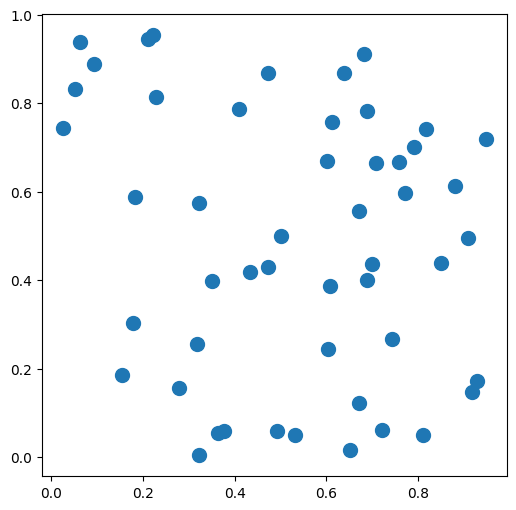

In [ ]:
n = 50
depot = 1
nodes = [i for i in range(1,1+n)]
data = {}
for n in nodes:
  data[n]=(random.random(),random.random(), random.randint(1,20))
data[depot]=(0.5, 0.5,0)
cars = range(4)
plt.figure(figsize=(6,6))
X= [data[n][0] for n in nodes]
Y= [data[n][1] for n in nodes]
plt.scatter(X,Y,s=100)
data

In [ ]:
def distance(n:int,m:int,data:dict)-> int:
  x1,y1 = data[n][0],data[n][1]
  x2,y2 = data[m][0],data[m][1]
  return int(100*np.sqrt( (x1-x2)**2+(y1-y2)**2))

distance(1,2,data)
print(nodes)

check = sum(data[n][2] for n in nodes)
print(check)

KOLORS = ['r','k','b','g']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
560


In [ ]:
for i in nodes:
  for j in nodes:
    if i>j and distance(i,j,data) <= 15:
      print(i,j, distance(i,j,data))


a= [distance(i,j,data) for i in nodes for j in nodes if i>j]
print(min(a),max(a), np.mean(a))



5 3 9
11 8 13
12 6 13
14 4 14
14 6 9
16 6 14
16 12 12
16 14 13
17 1 7
17 15 12
18 4 15
19 18 14
21 13 10
22 6 13
22 7 8
22 9 12
22 14 13
24 8 1
24 11 13
27 24 15
28 25 15
28 27 15
29 23 13
30 6 4
30 12 15
30 14 4
30 16 12
30 22 13
31 23 1
31 29 14
32 20 14
33 3 15
33 5 6
33 23 13
33 29 15
33 31 14
34 10 2
34 25 14
35 1 10
35 15 8
35 17 3
36 8 12
36 24 11
36 27 4
37 27 12
37 28 10
38 2 8
38 16 12
39 5 10
39 23 14
39 31 15
39 33 5
40 11 12
40 26 11
41 4 10
41 6 15
41 14 7
41 16 10
41 30 10
42 2 15
42 4 12
42 18 3
43 19 14
43 28 13
44 25 8
44 28 7
44 37 8
45 7 11
45 9 6
45 22 9
46 4 11
46 6 13
46 7 13
46 14 5
46 22 11
46 30 9
46 41 9
47 11 10
47 15 14
47 26 14
48 8 6
48 11 15
48 24 7
49 1 15
49 17 14
49 18 8
49 42 10
49 43 14
50 4 13
50 7 8
50 14 15
50 22 14
50 46 10
1 116 50.57795918367347


#TSP

Min of objective function: 505.0



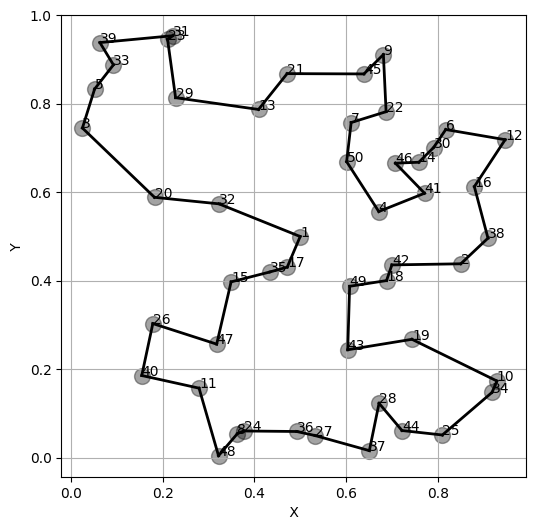

In [ ]:
def main() -> None:
    # Creates the model.
    cars = [1]
    Dmin = 12
    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j and distance(i,j,data)<70}


    for c in cars:
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c]
      model.AddCircuit(arcs)

    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 90
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))
              plt.scatter(x1,y1,c=KOLORS[c], s= 130, alpha=0.2)
              plt.scatter(x2,y2,c=KOLORS[c], s= 130, alpha=0.2)

        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()

#CVRP

Min of objective function: 1028.0



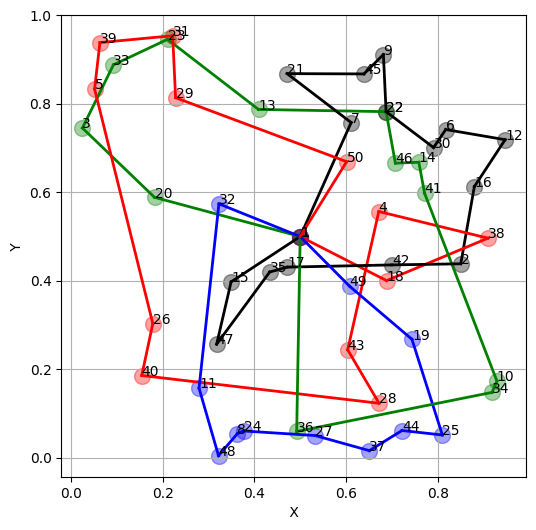

In [ ]:
def main() -> None:
    # Creates the model.
    cars = range(4)
    cap = {0:150, 1:190, 2:130, 3:170}

    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j and distance(i,j,data)<70}
    assign = {(i,c): model.NewBoolVar(f"assign_{i}_{c}") for i in nodes for c in cars}
    used_car = {c: model.NewBoolVar(f"used_{c}") for c in cars}

    for i in nodes:
      expressions = [assign[i,c] for c in cars]
      model.AddAtLeastOne(expressions)

    for (i,c),v in assign.items():
      model.Add(v<=used_car[c])

    for c in cars:
      model.Add(assign[depot,c]==used_car[c])
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c] + [(i,i,assign[i,c].Not()) for i in nodes]
      model.AddCircuit(arcs)

      expressions = [v*data[i][2] for (i,cc),v in assign.items() if c ==cc]
      model.Add(sum(expressions) <= cap[c])

    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 360
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))
              plt.scatter(x1,y1,c=KOLORS[c], s= 130, alpha=0.2)
              plt.scatter(x2,y2,c=KOLORS[c], s= 130, alpha=0.2)

        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()

# Covering VRP

Min of objective function: 502.0

1 0 1
1 1 1
1 2 1
1 3 1
2 2 1
5 3 1
11 0 1
13 3 1
16 2 1
17 1 1
19 1 1
20 3 1
22 2 1
23 3 1
24 0 1
26 0 1
29 3 1
30 2 1
32 3 1
34 0 1
36 0 1
42 2 1
43 1 1
44 0 1
49 1 1
50 2 1


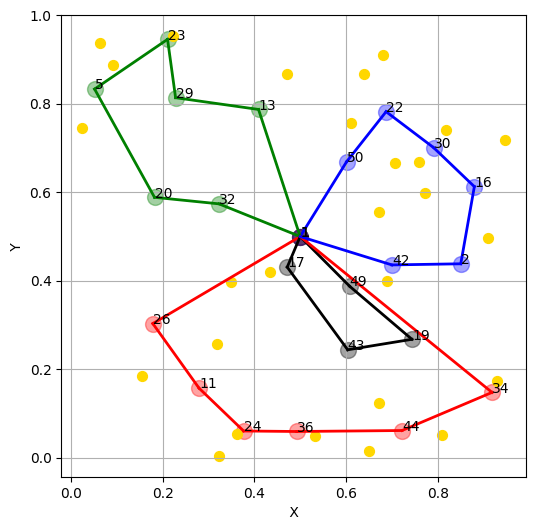

In [ ]:
def main() -> None:
    # Creates the model.
    cars = range(4)
    cap = {0:100, 1:190, 2:130, 3:70}

    Dmin = 12
    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j and distance(i,j,data)<70}
    assign = {(i,c): model.NewBoolVar(f"assign_{i}_{c}") for i in nodes for c in cars}
    used_car = {c: model.NewBoolVar(f"used_{c}") for c in cars}
    in_route = {i: model.NewBoolVar(f"in_route_{i}") for i in nodes}

    for i in nodes:
      expressions = [assign[i,c] for c in cars] + [v for n,v in in_route.items() if n!=i and distance(i,n,data)<= Dmin]
      model.AddAtLeastOne(expressions)
      model.Add(in_route[i] <= sum(assign[i,c] for c in cars) )

    for (i,c),v in assign.items():
      model.Add(v<=used_car[c])
      model.Add(v<=in_route[i])



    for c in cars:
      model.Add(assign[depot,c]==used_car[c])
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c] + [(i,i,assign[i,c].Not()) for i in nodes]
      model.AddCircuit(arcs)
      model.Add( sum(assign[i,c] for i in nodes) <= 7)


      #expressions = [v*data[i][2] for (i,cc),v in assign.items() if c ==cc]
      #model.Add(sum(expressions) <= cap[c])

    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 360
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]
        #plt.scatter(X,Y,s=100)

        for (i,c),v in assign.items():
          if solver.value(v)>0:
            print(i,c, solver.value(in_route[i]) )

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))
              plt.scatter(x1,y1,c=KOLORS[c], s= 130, alpha=0.2)
              plt.scatter(x2,y2,c=KOLORS[c], s= 130, alpha=0.2)

        for n,v in in_route.items():
          if not solver.value(v):
            x1,y1 = data[n][0],data[n][1]
            plt.scatter(x1,y1,c='gold', s= 50)


        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()

# Limited Daily Distance

Min of objective function: 642.0

1 0 1
1 1 1
1 2 1
1 3 1
2 2 1
5 3 1
7 3 1
14 3 1
15 0 1
16 2 1
19 2 1
20 2 1
21 3 1
22 2 1
24 1 1
26 1 1
29 2 1
31 3 1
32 0 1
34 1 1
36 1 1
43 0 1
44 1 1
46 3 1
47 0 1
49 1 1


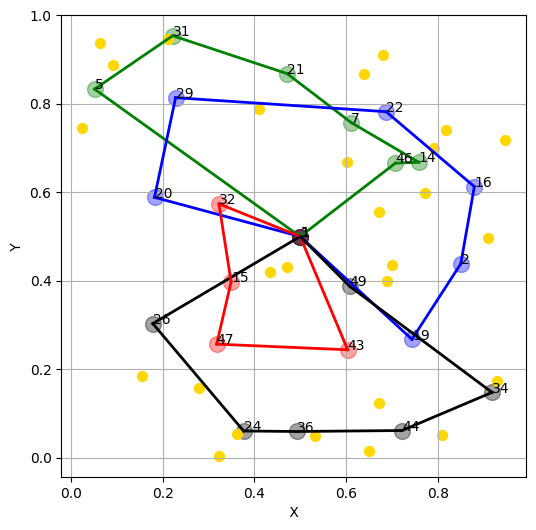

In [ ]:
def main() -> None:
    # Creates the model.
    cars = range(4)
    cap = {0:100, 1:190, 2:130, 3:70}
    Dmin = 12
    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j and distance(i,j,data)<70}
    assign = {(i,c): model.NewBoolVar(f"assign_{i}_{c}") for i in nodes for c in cars}
    used_car = {c: model.NewBoolVar(f"used_{c}") for c in cars}
    in_route = {i: model.NewBoolVar(f"in_route_{i}") for i in nodes}

    for i in nodes:
      expressions = [assign[i,c] for c in cars] + [v for n,v in in_route.items() if n!=i and distance(i,n,data)<= Dmin]
      model.AddAtLeastOne(expressions)
      model.Add(in_route[i] <= sum(assign[i,c] for c in cars) )

    for (i,c),v in assign.items():
      model.Add(v<=used_car[c])
      model.Add(v<=in_route[i])

    for c in cars:
      model.Add(assign[depot,c]==used_car[c])
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c] + [(i,i,assign[i,c].Not()) for i in nodes]
      model.AddCircuit(arcs)
      model.Add( sum(assign[i,c] for i in nodes) <= 7)

      arcs_distance= [ distance(i,j,data)*v for (i,j,cc),v in x.items() if cc == c]
      model.Add( sum(arcs_distance) <= 230)


    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 360
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]
        #plt.scatter(X,Y,s=100)

        for (i,c),v in assign.items():
          if solver.value(v)>0:
            print(i,c, solver.value(in_route[i]) )

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))
              plt.scatter(x1,y1,c=KOLORS[c], s= 130, alpha=0.2)
              plt.scatter(x2,y2,c=KOLORS[c], s= 130, alpha=0.2)

        for n,v in in_route.items():
          if not solver.value(v):
            x1,y1 = data[n][0],data[n][1]
            plt.scatter(x1,y1,c='gold', s= 50)

        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()

In [ ]:
data = {1: (0.5, 0.5, 0),
 2: (0.6032938169082293, 0.7562108184145938, 20),
 3: (0.07472475201926587, 0.7390918600532372, 18),
 4: (0.22499063130328856, 0.20230576957968283, 13),
 5: (0.3771457600244701, 0.993883586940067, 16),
 6: (0.996944577187803, 0.6516022694530335, 7),
 7: (0.013989304846158013, 0.24618666302814662, 3),
 8: (0.4548557134824929, 0.7878016821009027, 13),
 9: (0.5568871799369395, 0.6669799494093894, 14),
 10: (0.37068093166049076, 0.7990225388206484, 1),
 11: (0.13140393664262962, 0.1487946611744766, 3),
 12: (0.17885860292736544, 0.2831786658489319, 10),
 13: (0.645737926048391, 0.3408452578158331, 19),
 14: (0.7919716098508769, 0.5663126369728344, 12),
 15: (0.25524445622471126, 0.1583777731314686, 14),
 16: (0.3114838478536932, 0.6499966765965005, 13),
 17: (0.7206591160396403, 0.7068882032670168, 9),
 18: (0.9735099670408185, 0.99498727064737, 7),
 19: (0.3446038119418944, 0.046683484069192205, 6),
 20: (0.2866425752959685, 0.1386034957501685, 3),
 21: (0.7359808817862824, 0.6175331659881196, 18),
 22: (0.056060698512151896, 0.7515471525583471, 18),
 23: (0.4691656620420057, 0.23156333131292528, 19),
 24: (0.06745145873207303, 0.934247095558798, 4),
 25: (0.37858740812291514, 0.5077961737787795, 19),
 26: (0.21334957418751244, 0.9540270789381442, 3),
 27: (0.28283468399896206, 0.3083517437471849, 16),
 28: (0.5886291812238953, 0.8679496341114058, 10),
 29: (0.9674826365155533, 0.8320343392712091, 5),
 30: (0.8026408428054114, 0.0728358973124098, 20),
 31: (0.9370405149153596, 0.2261035500568983, 4),
 32: (0.6072715319442913, 0.37614658647552157, 10),
 33: (0.46853796283667126, 0.32438433888065366, 5),
 34: (0.4090201468977761, 0.17564145770516748, 16),
 35: (0.6304063670472589, 0.638292935577014, 10),
 36: (0.39405313421741417, 0.24933500378837625, 19),
 37: (0.5560469493243064, 0.8801750770325597, 20),
 38: (0.4379318248166867, 0.8595094904563212, 14),
 39: (0.8280305260276702, 0.659301731750247, 1),
 40: (0.13204901760775145, 0.04696013025075063, 5),
 41: (0.6946766364236925, 0.5562151544097507, 5),
 42: (0.824581355993853, 0.20818113444075237, 19),
 43: (0.7311949644222034, 0.797467367911236, 19),
 44: (0.8720761313303419, 0.08084865167025124, 15),
 45: (0.9701218237397088, 0.28646200937012034, 4),
 46: (0.8989802529783747, 0.6082737978741279, 1),
 47: (0.7056248998454107, 0.3165413180925287, 2),
 48: (0.4128232903252721, 0.05124605363660595, 13),
 49: (0.4982710323038596, 0.9193310635665481, 16),
 50: (0.9984552552245346, 0.5302810649297262, 8)}

new= {}
for n,(x,y,T) in data.items():
  new[n]= (round(x,3),round(y,3),T)
new

{1: (0.5, 0.5, 0),
 2: (0.603, 0.756, 20),
 3: (0.075, 0.739, 18),
 4: (0.225, 0.202, 13),
 5: (0.377, 0.994, 16),
 6: (0.997, 0.652, 7),
 7: (0.014, 0.246, 3),
 8: (0.455, 0.788, 13),
 9: (0.557, 0.667, 14),
 10: (0.371, 0.799, 1),
 11: (0.131, 0.149, 3),
 12: (0.179, 0.283, 10),
 13: (0.646, 0.341, 19),
 14: (0.792, 0.566, 12),
 15: (0.255, 0.158, 14),
 16: (0.311, 0.65, 13),
 17: (0.721, 0.707, 9),
 18: (0.974, 0.995, 7),
 19: (0.345, 0.047, 6),
 20: (0.287, 0.139, 3),
 21: (0.736, 0.618, 18),
 22: (0.056, 0.752, 18),
 23: (0.469, 0.232, 19),
 24: (0.067, 0.934, 4),
 25: (0.379, 0.508, 19),
 26: (0.213, 0.954, 3),
 27: (0.283, 0.308, 16),
 28: (0.589, 0.868, 10),
 29: (0.967, 0.832, 5),
 30: (0.803, 0.073, 20),
 31: (0.937, 0.226, 4),
 32: (0.607, 0.376, 10),
 33: (0.469, 0.324, 5),
 34: (0.409, 0.176, 16),
 35: (0.63, 0.638, 10),
 36: (0.394, 0.249, 19),
 37: (0.556, 0.88, 20),
 38: (0.438, 0.86, 14),
 39: (0.828, 0.659, 1),
 40: (0.132, 0.047, 5),
 41: (0.695, 0.556, 5),
 42: (0.8

Min of objective function: 645.0

1 0 1
1 1 1
1 2 1
1 3 1
3 3 1
5 1 1
7 3 1
8 2 1
11 3 1
14 2 1
16 3 1
17 1 1
18 2 1
24 1 1
26 1 1
27 3 1
28 1 1
28 2 1
29 2 1
30 0 1
31 0 1
33 0 1
34 0 1
35 1 1
46 2 1
47 0 1
48 0 1


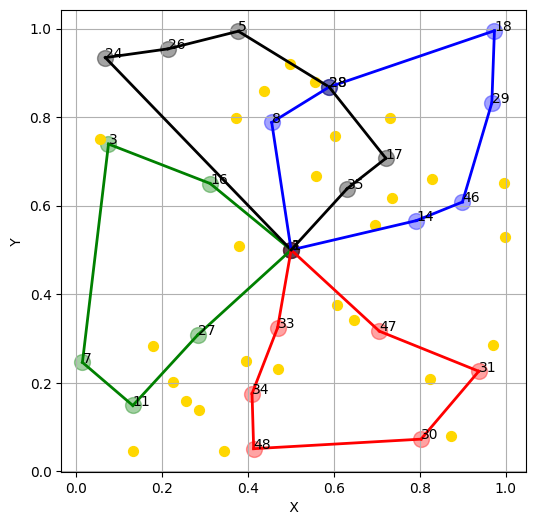

In [ ]:
def main() -> None:
    # Creates the model.
    cars = range(4)
    cap = {0:100, 1:190, 2:130, 3:70}
    Dmin = 12
    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j and distance(i,j,data)<70}
    assign = {(i,c): model.NewBoolVar(f"assign_{i}_{c}") for i in nodes for c in cars}
    used_car = {c: model.NewBoolVar(f"used_{c}") for c in cars}
    in_route = {i: model.NewBoolVar(f"in_route_{i}") for i in nodes}

    for i in nodes:
      expressions = [assign[i,c] for c in cars] + [v for n,v in in_route.items() if n!=i and distance(i,n,data)<= Dmin]
      model.AddAtLeastOne(expressions)
      model.Add(in_route[i] <= sum(assign[i,c] for c in cars) )

    for (i,c),v in assign.items():
      model.Add(v<=used_car[c])
      model.Add(v<=in_route[i])

    arcs_distance = {}
    for c in cars:
      model.Add(assign[depot,c]==used_car[c])
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c] + [(i,i,assign[i,c].Not()) for i in nodes]
      model.AddCircuit(arcs)
      model.Add( sum(assign[i,c] for i in nodes) <= 7)
      arcs_distance[c]= sum([ distance(i,j,data)*v for (i,j,cc),v in x.items() if cc == c] )


    for c1 in cars:
      for c2 in cars:
        if c1>c2:
          model.Add( arcs_distance[c1]-arcs_distance[c2] <=  100)
          model.Add(-arcs_distance[c1]+arcs_distance[c2] >= -100)



    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 360
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]
        #plt.scatter(X,Y,s=100)

        for (i,c),v in assign.items():
          if solver.value(v)>0:
            print(i,c, solver.value(in_route[i]) )

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))
              plt.scatter(x1,y1,c=KOLORS[c], s= 130, alpha=0.2)
              plt.scatter(x2,y2,c=KOLORS[c], s= 130, alpha=0.2)

        for n,v in in_route.items():
          if not solver.value(v):
            x1,y1 = data[n][0],data[n][1]
            plt.scatter(x1,y1,c='gold', s= 50)

        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()